## Data and Advanced Network Design

[link](https://ut.philkr.net/deeplearning/making_it_work/data_and_advanced_network_design/)

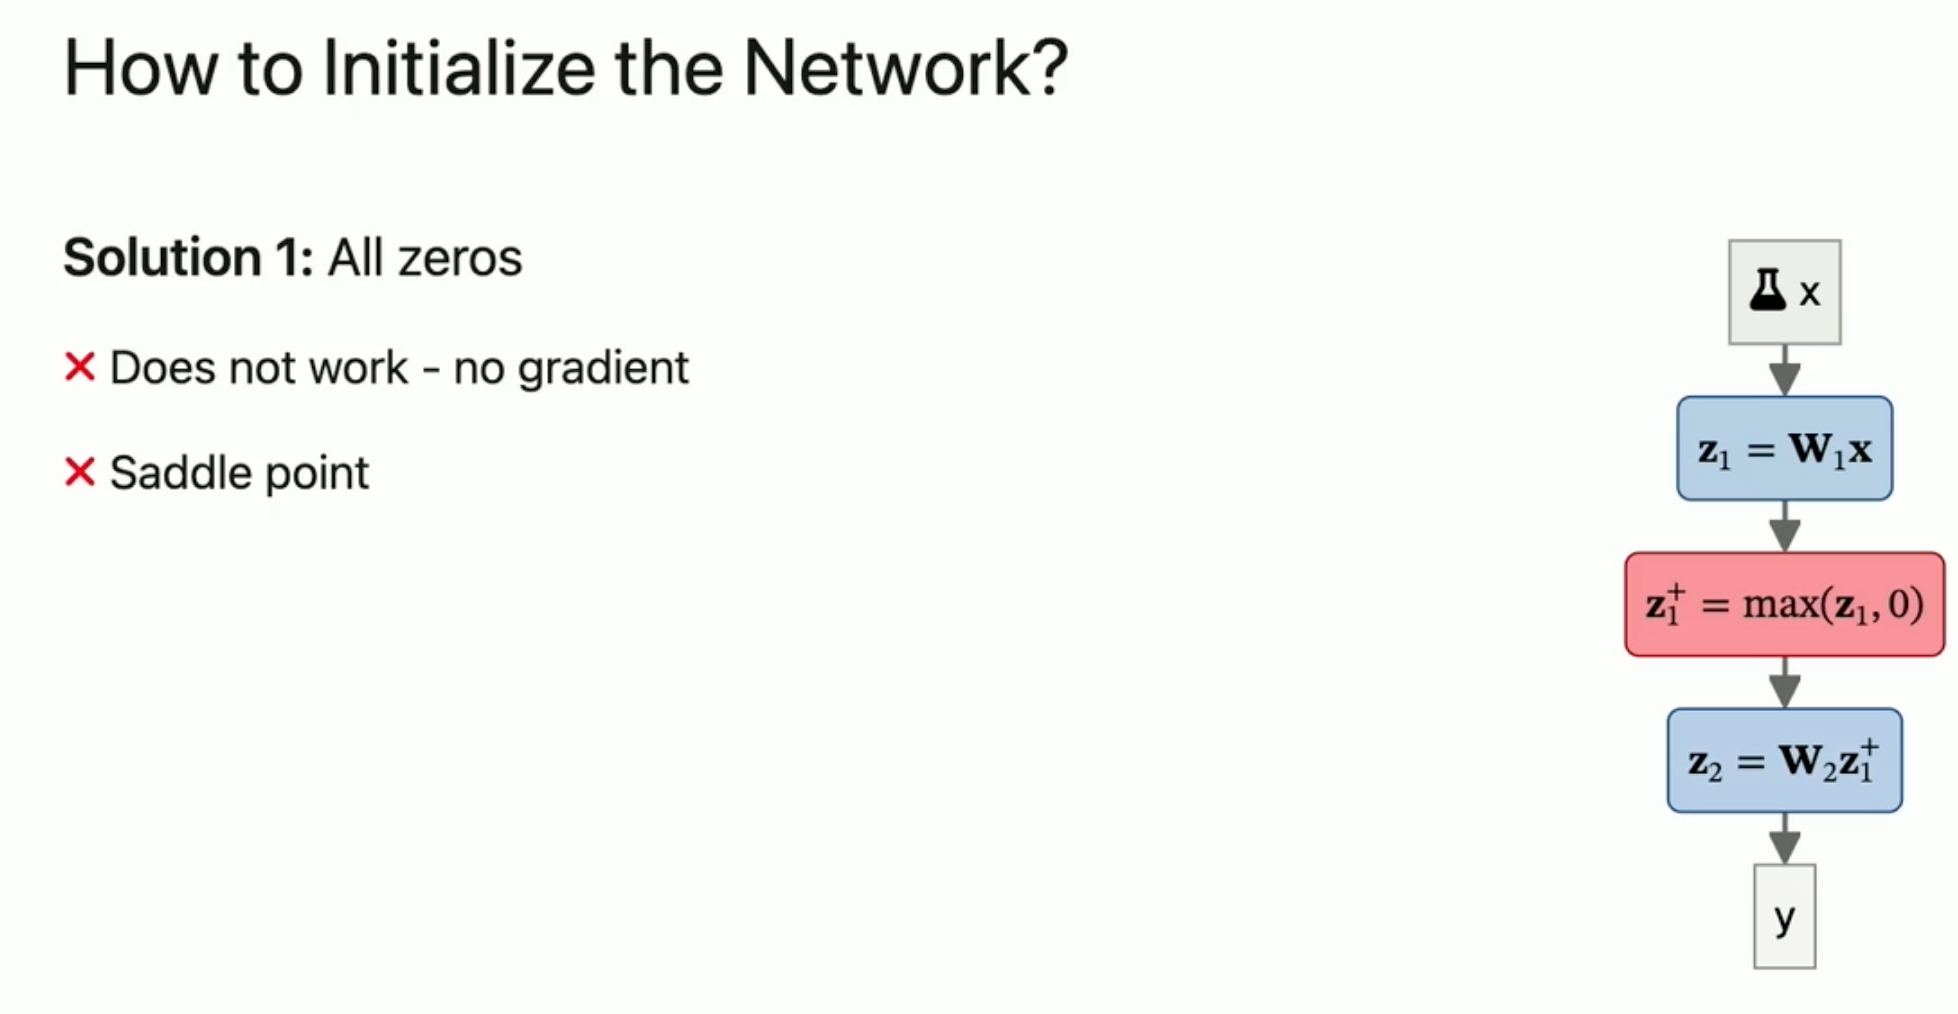

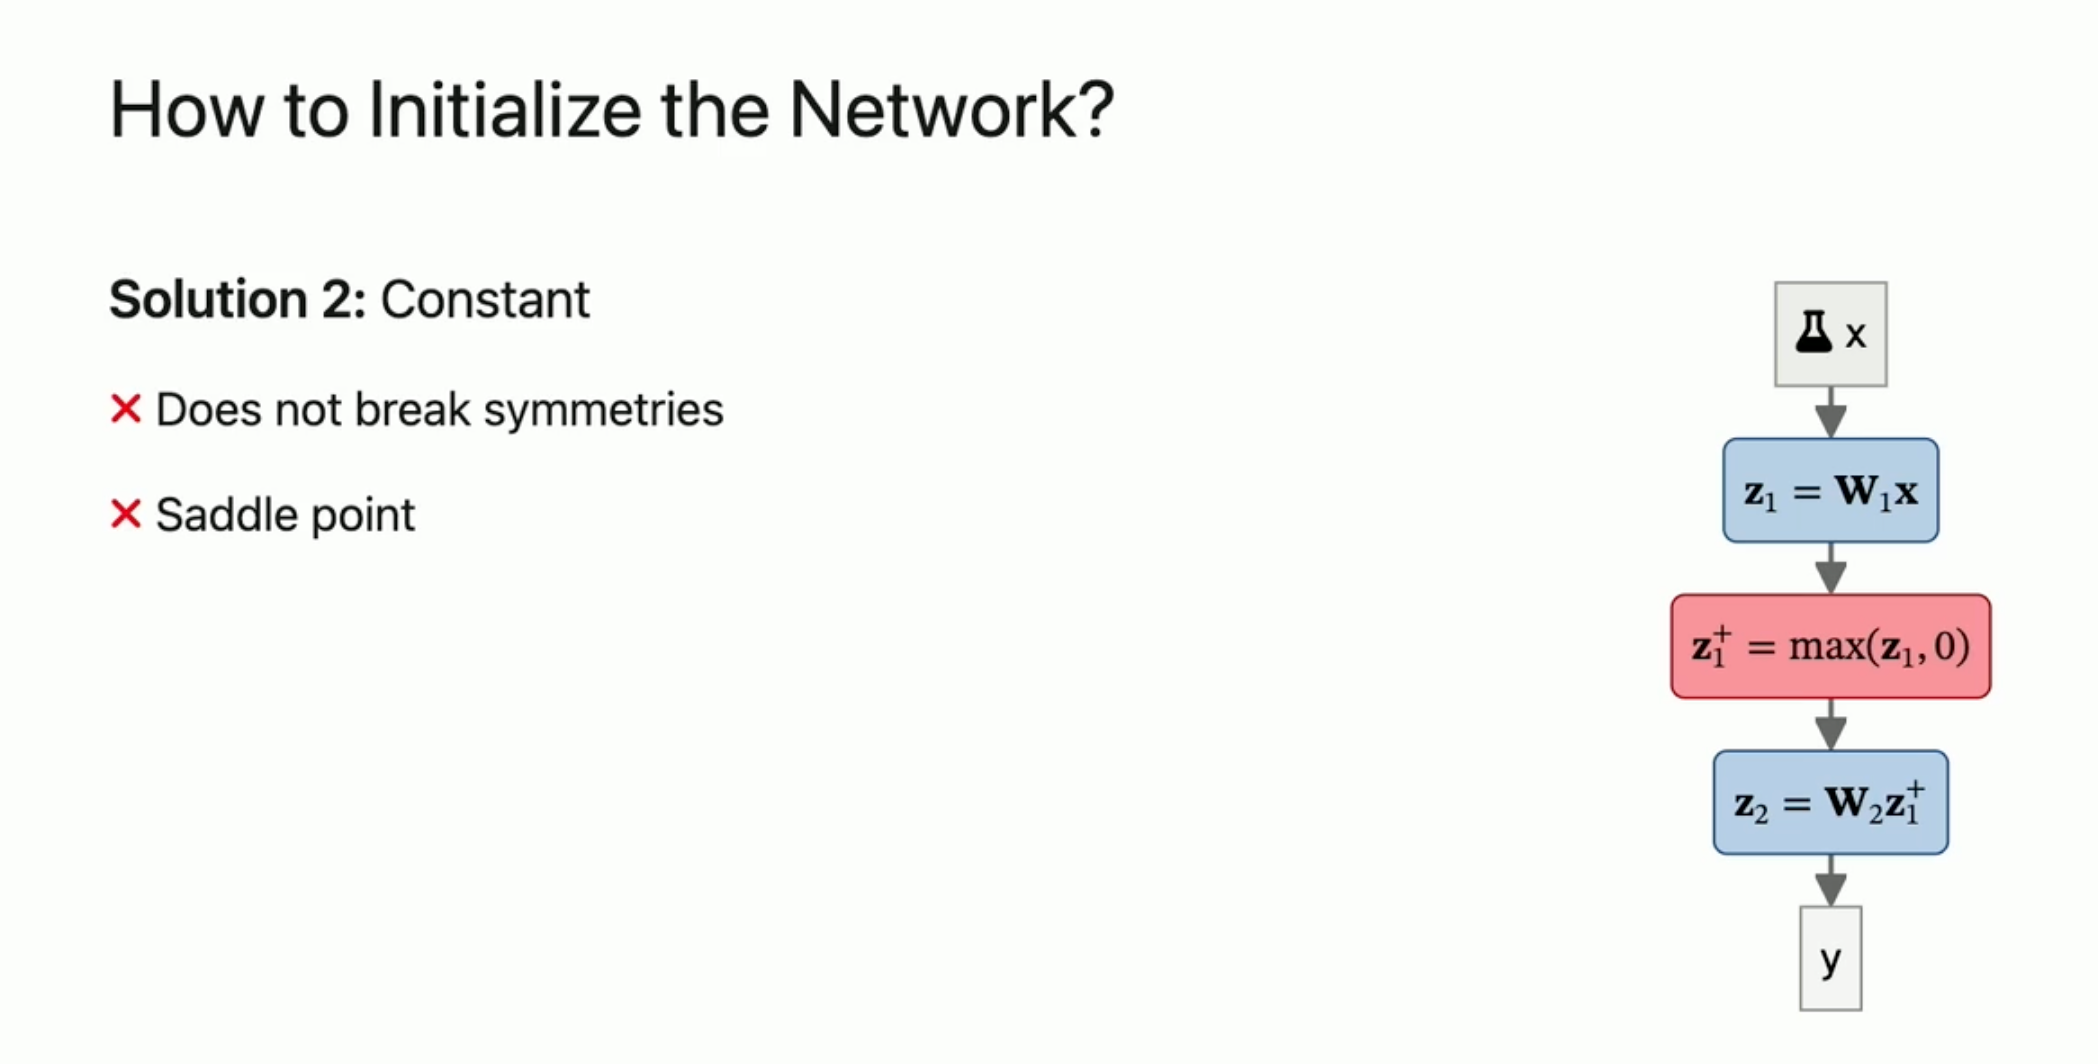

## Property: Constant initialization does not work

Constant $0$ initialization could be a good idea because no bias is introduced but this creates a symetry in the weights that gradients updates can't break.


Consider a simple two layer multilayer perceptrom
$$\text{Linear2}_{W^{(2)},b^{(2)}}(\text{Activtion}(\text{Linear1}_{W^{(1)},b^{(1)}}(x)))$$
where
$$
\begin{align*}
\text{Linear1}_{W^{(1)},b^{(1)}}(x)&=W^{(1)}x+b^{(1)},\\
\text{Linear2}_{W^{(2)},b^{(1)}}(x)&=W^{(2)}x+b^{(2)},
\end{align*}
$$
and $\text{Activtion}$ is an arbitrary real function applied componentwise over vectors. 

Consider the properties
* $W^{(1)}$ has constant columns (i.e. $W^{(1)}_{i,j}=c^{(1)}_j, \ \forall\ i,j$)
* $b^{(1)}$ is constant (i.e. $b^{(1)}_{i}=d^{(1)}, \ \forall\ i$)
* $W^{(2)}$ is constant (i.e. $W^{(2)}_{i,j}=c^{(2)}, \ \forall\ i,j$)
* $b^{(2)}$ is constant (i.e. $b^{(2)}_{i}=d^{(2)}, \ \forall\ i$)

We assume alse that the loss funciton is permutation invariant $\text{loss}(\pi(x))=\text{loss}(\pi(x))$ for any (index) permutation $x$. This is not restrictive at all. It is easy to check that Mean square loss is permutation equivariant 
$$\text{MSE}(\pi(x))=\sum_{i=1}x_{\pi(i)}^2=\sum_{i=1}x_{i}^2=\text{MSE}(x).$$
This implies that the derivative are equal
$$\frac{\partial f}{x_{j}}(x)=\lim_{h\to0}\frac{f(x+he_{j})-f(x)}{h}=\lim_{h\to0}\frac{f(x+he_{i})-f(x)}{h}=\frac{\partial f}{x_{i}}(x),$$
where in the second equlity weappliy the permutation that swap $i$ and $j$.

Under this condition, if the initial weights satiesfy these properties then, these properties are preserved along epochs (after the weights are updated with the gradient information)

**Proof:**
Consider
* $W^{(1)}_{i,j}=c^{(1)}_j, \ \forall\ i,j$
* $b^{(1)}_{i}=d^{(1)}, \ \forall\ i$
* $W^{(2)}_{i,j}=c^{(2)}, \ \forall\ i,j$
* $b^{(2)}_{i}=d^{(2)}, \ \forall\ i$

and let's adopt the following notatioin:
\begin{align*}
y^{(1)} &= \text{Linear1}_{W^{(1)},b^{(1)}}(x),\\
y^{(a)} &= \text{Activtion}(y^{(1)}),\\
y^{(2)} &= \text{Linear2}_{W^{(2)},b^{(2)}}(y^{(a)}).
\end{align*}
$$

First notice that under this properites the output of the first layer is constant:
$$
\begin{align*}
y^{(1)}&=\text{Linear1}_{W^{(1)},b^{(1)}}(x),\\
&=W^{(1)}x+b^{(1)}=\begin{pmatrix}
\sum_{j}w^{(1)}_{1,j}x_j +b^{(1)}_1\\ 
\sum_{j}w^{(1)}_{2,j}x_j +b^{(1)}_2\\ 
\vdots\\
\sum_{j}w^{(1)}_{N_1,j}x_j +b^{(1)}_{N_1}\\ 
\end{pmatrix}
=\begin{pmatrix}
\sum_{j}c^{(1)}_{j}x_j +d^{(1)}\\ 
\sum_{j}c^{(1)}_{j}x_j +d^{(1)}\\ 
\vdots\\
\sum_{j}c^{(1)}_{j}x_j +d^{(1)}\\ 
\end{pmatrix}\\
&=\left(\sum_{j}c^{(1)}_{j}x_j +d^{(1)}\right)1_{N_1}.\\
y^{(a)}&=\text{Activation}(y^{(1)}),\\
&=\text{Activation}\left(\left(\sum_{j}c^{(1)}_{j}x_j +d^{(1)}\right)1_{N_a}\right),\\
&=\text{Activation}\left(\sum_{j}c^{(1)}_{j}x_j +d^{(1)}\right)1_{N_a},\\
y^{(2)}&=\text{Linear1}_{W^{(2)},b^{(2)}}(y^{(a)}),\\
&=W^{(2)}y^{(a)}+b^{(2)},\\
&=\text{Activation}\left(\sum_{j}c^{(1)}_{j}x_j +d^{(1)}\right)W^{(2)}1_{N_2}+b^{(2)},\\
&=\left(N_2c^{(2)}\text{Activation}\left(\sum_{j}c^{(1)}_{j}x_j +d^{(1)}\right)+d^{(2)}\right)1_{N_2}.
\end{align*}\\
$$
So, all the vectors $y^{(1)},y^{(a)},y^{(2)}$ are constant. Let's denote for all $i$-th component $y^{(1)}_i=o^{(1)}$,$y^{(a)}_i=o^{(a)}$ and $y_i^{(2)}=o^{(2)}$, then we have

Then
$$
\begin{align*}
\frac{\partial \text{loss}}{\partial w^{(1)}_{i,j}}&=\frac{\partial \text{loss}}{\partial y^{(2)}}\frac{\partial y^{(2)}}{\partial y^{(a)}_{i}}\frac{\partial y^{(a)}_{i}}{\partial y^{(1)}_{i}}\frac{\partial y^{(1)}_{i}}{\partial w^{(1)}_{i,j}},\\
&=\frac{\partial \text{loss}}{\partial y^{(2)}}W^{(2)}_{:,i}\frac{\partial \text{Activation}}{\partial x_{i}}(y^{(1)}_i)x_j,\\

&=\left(\sum_k\frac{\partial \text{loss}}{\partial y_k}(y^{(2)}_k)W^{(2)}_{k,i}\right)\frac{\partial \text{Activation}}{\partial x}(o^{(1)})x_j,\\
&=N_2\frac{\partial \text{loss}}{\partial y}(o^{(2)})c^{(2)}\frac{\partial \text{Activation}}{\partial x}\left(o^{(1)}\right)x_j,\\
\end{align*}
$$
Then $\frac{\partial \text{loss}}{\partial w^{(1)}_{i,j}}$ is constant along index $i$ and consequently $W^{(1)}$ has constant columns after being updated. 

The results forthe bias $b^{(1)}$ is analogous, notice that
$$
\begin{align*}
\frac{\partial \text{loss}}{\partial b^{(1)}_{i}}&=\frac{\partial \text{loss}}{\partial y^{(2)}}\frac{\partial y^{(2)}}{\partial y^{(a)}_{i}}\frac{\partial y^{(a)}_{i}}{\partial y^{(1)}_{i}}\frac{\partial y^{(1)}_{i}}{\partial b^{(1)}_{i}},\\
&=\frac{\partial \text{loss}}{\partial y^{(2)}}W^{(2)}_{:,i}\frac{\partial \text{Activation}}{\partial x_{i}}(y^{(1)}_i)\cdot 1,\\
&=\left(\sum_k\frac{\partial \text{loss}}{\partial y_k}(y^{(2)}_k)W^{(2)}_{k,i}\right)\frac{\partial \text{Activation}}{\partial x}\left(\sum_{k}c^{(1)}_{k}x_k+d^{(1)}\right),\\
&=N_2\frac{\partial \text{loss}}{\partial y}(o^{(2)})c^{(2)}\frac{\partial \text{Activation}}{\partial x}\left(\sum_{k}c^{(1)}_{k}x_k+d^{(1)}\right).
\end{align*}
$$
So, $\frac{\partial \text{loss}}{\partial b^{(1)}_{i}}$ is independent of $i$.

For the second weights we have
$$
\begin{align*}
\frac{\partial \text{loss}}{\partial W^{(2)}_{i,j}}&=\frac{\partial \text{loss}}{\partial y_i^{(2)}}\frac{\partial y_i^{(2)}}{\partial W^{(2)}_{i,j}},\\
&=\frac{\partial \text{loss}}{\partial y_i}(y_i^{(2)})y^{(a)}_j,\\
&=\frac{\partial \text{loss}}{\partial y}(o^{(2)})o^{(a)}.
\end{align*}
$$

Finally, for the bias wehave
$$
\begin{align*}
\frac{\partial \text{loss}}{\partial b^{(2)}_{i}}&=\frac{\partial \text{loss}}{\partial y_i^{(2)}}\frac{\partial y_i^{(2)}}{\partial b^{(2)}_{i}},\\
&=\frac{\partial \text{loss}}{\partial y_i}(y_i^{(2)})\cdot 1,\\
&=\frac{\partial \text{loss}}{\partial y}(o^{(2)}).
\end{align*}
$$

Then all four properties are preserved after adding an scaled gradiant vector.

## Code: Constant initializtion does not work

In [1]:
import torch
import torch.nn as nn

In [2]:
class ConstInit(nn.Module):
    def __init__(self, init_w: float,init_b: float,layer_dims = [3,2,4],bias: bool = False):
        super().__init__()  
        d1,d2,d3 = layer_dims
        self.linear1 = nn.Linear(d1, d2,bias=bias)
        self.linear2 = nn.Linear(d2, d3,bias=bias)
        if bias:
            nn.init.constant_(self.linear1.bias, init_b)
            nn.init.constant_(self.linear2.bias, init_b)
        self.relu = nn.ReLU()
        
        # Each column j gets value init_value + j
        col_values = init_w + torch.arange(d1).float()  # shape (in_f,)

        # Repeat for each row
        W = col_values.unsqueeze(0).repeat(d2, 1)  # shape (out_f, in_f)

        with torch.no_grad():
            self.linear1.weight.copy_(W)
      
        nn.init.constant_(self.linear2.weight, init_w)  
    
    def print_parameters(self):
        for name , w in self.named_parameters():
            print(name, w)
    
    def forward(self, x):
        x1 = self.linear1(x)
        x_relu = self.relu(x1)
        x2= self.linear2(x_relu)
        return x2

In [3]:
net = ConstInit(init_w=1.0,init_b=0.5,bias=True)
net.print_parameters()

linear1.weight Parameter containing:
tensor([[1., 2., 3.],
        [1., 2., 3.]], requires_grad=True)
linear1.bias Parameter containing:
tensor([0.5000, 0.5000], requires_grad=True)
linear2.weight Parameter containing:
tensor([[1., 1.],
        [1., 1.],
        [1., 1.],
        [1., 1.]], requires_grad=True)
linear2.bias Parameter containing:
tensor([0.5000, 0.5000, 0.5000, 0.5000], requires_grad=True)


## Evaluation

In [4]:
x = torch.randn(4, 3)
y = torch.full((4, 4), 1.0)
out = net(x)
print("Output:", out)
print("Target:", y)

Output: tensor([[1.6657, 1.6657, 1.6657, 1.6657],
        [3.4921, 3.4921, 3.4921, 3.4921],
        [6.7266, 6.7266, 6.7266, 6.7266],
        [2.6986, 2.6986, 2.6986, 2.6986]], grad_fn=<AddmmBackward0>)
Target: tensor([[1., 1., 1., 1.],
        [1., 1., 1., 1.],
        [1., 1., 1., 1.],
        [1., 1., 1., 1.]])


In [5]:
optimizer = torch.optim.SGD(net.parameters(), lr=0.1)
loss_fn = nn.MSELoss()

In [6]:
for i in range(50):
    loss = loss_fn(net(x+i), y+i)
    loss.backward()
    optimizer.step()
    optimizer.zero_grad()
    net.print_parameters()


linear1.weight Parameter containing:
tensor([[1.2768, 1.6750, 2.8157],
        [1.2768, 1.6750, 2.8157]], requires_grad=True)
linear1.bias Parameter containing:
tensor([-0.0291, -0.0291], requires_grad=True)
linear2.weight Parameter containing:
tensor([[0.7023, 0.7023],
        [0.7023, 0.7023],
        [0.7023, 0.7023],
        [0.7023, 0.7023]], requires_grad=True)
linear2.bias Parameter containing:
tensor([0.3677, 0.3677, 0.3677, 0.3677], requires_grad=True)
linear1.weight Parameter containing:
tensor([[0.7862, 0.0144, 1.5737],
        [0.7862, 0.0144, 1.5737]], requires_grad=True)
linear1.bias Parameter containing:
tensor([-1.0714, -1.0714], requires_grad=True)
linear2.weight Parameter containing:
tensor([[-1.7447, -1.7447],
        [-1.7447, -1.7447],
        [-1.7447, -1.7447],
        [-1.7447, -1.7447]], requires_grad=True)
linear2.bias Parameter containing:
tensor([-0.0033, -0.0033, -0.0033, -0.0033], requires_grad=True)
linear1.weight Parameter containing:
tensor([[ -6.9880, 

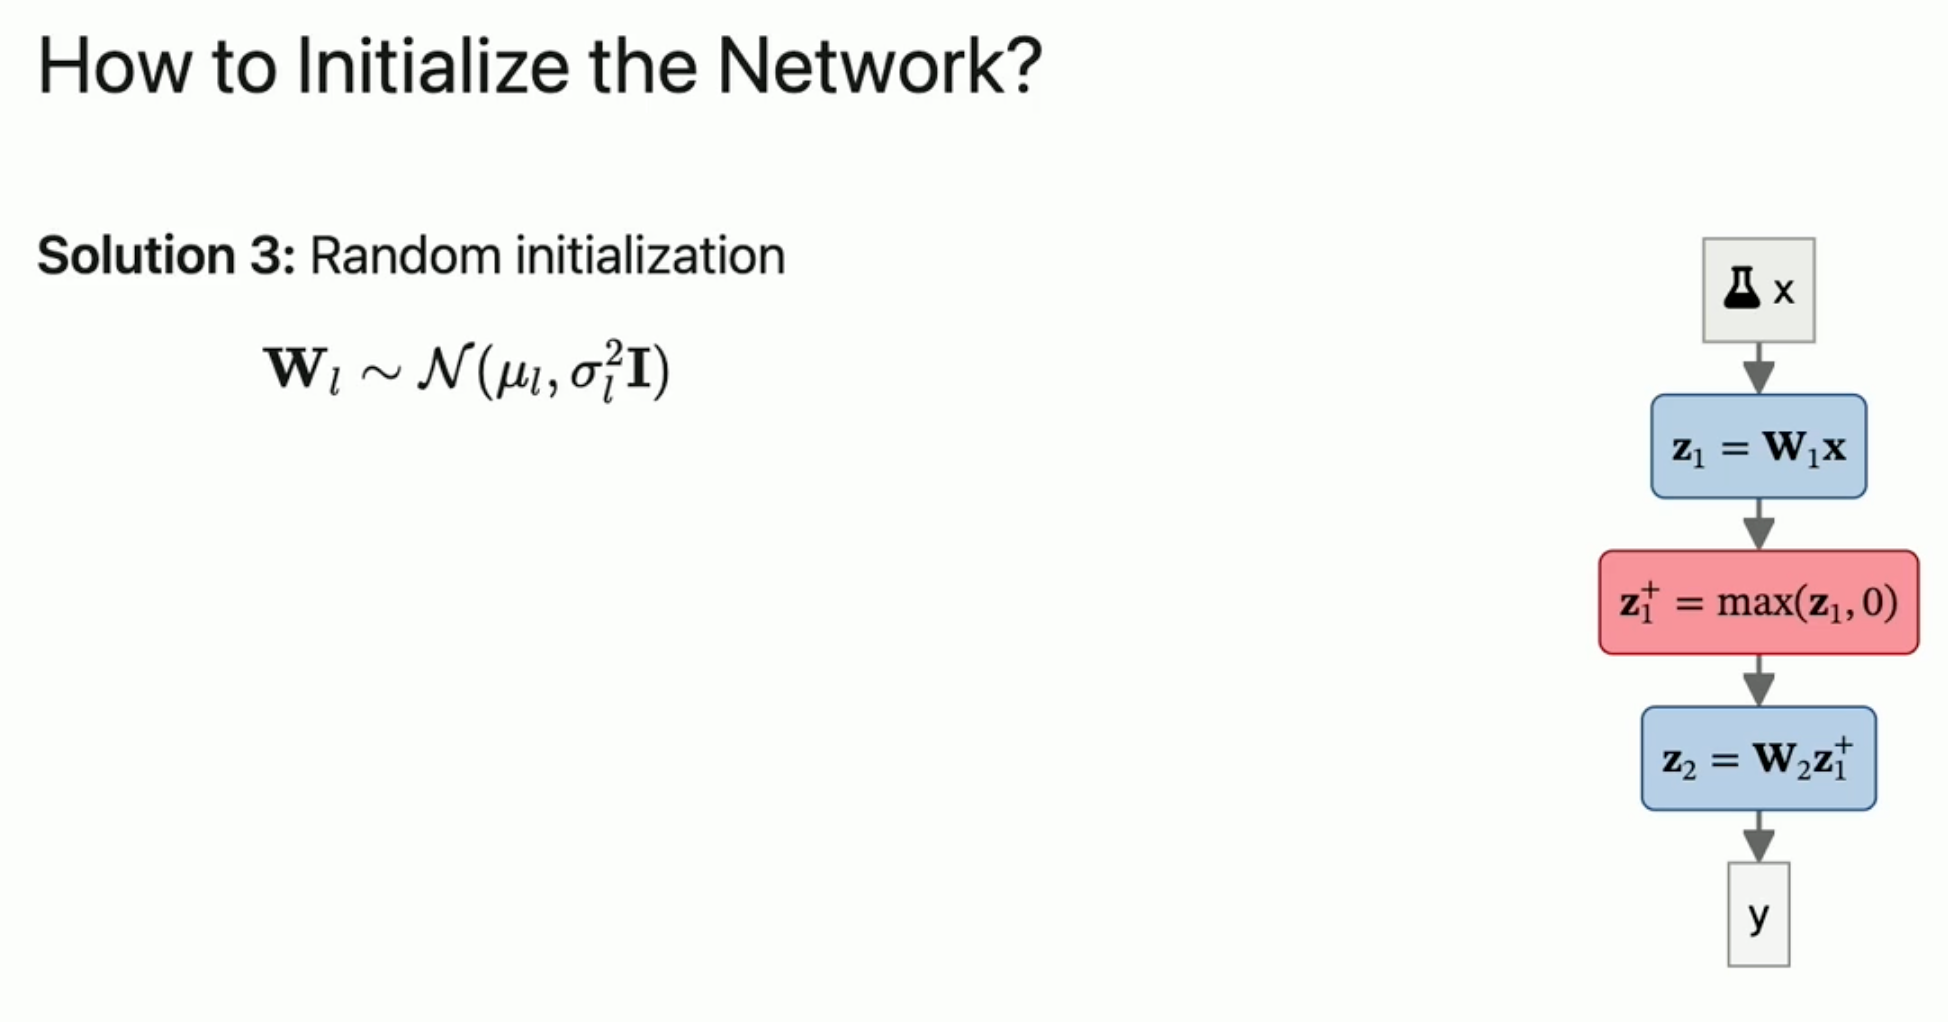

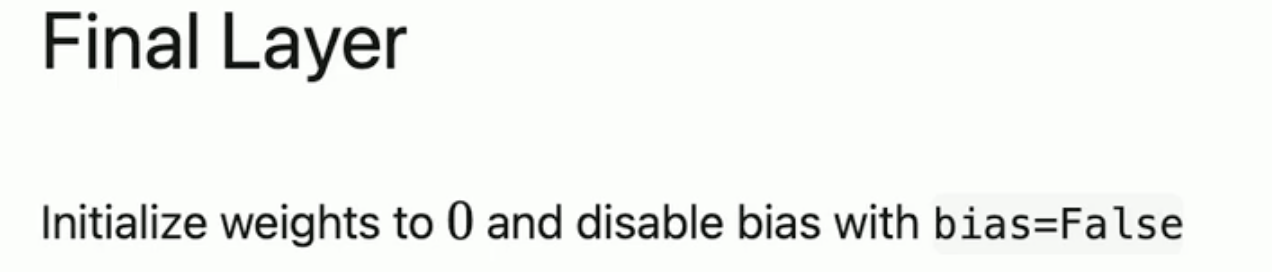

only works with Sthocastic Gradiendt Decent?

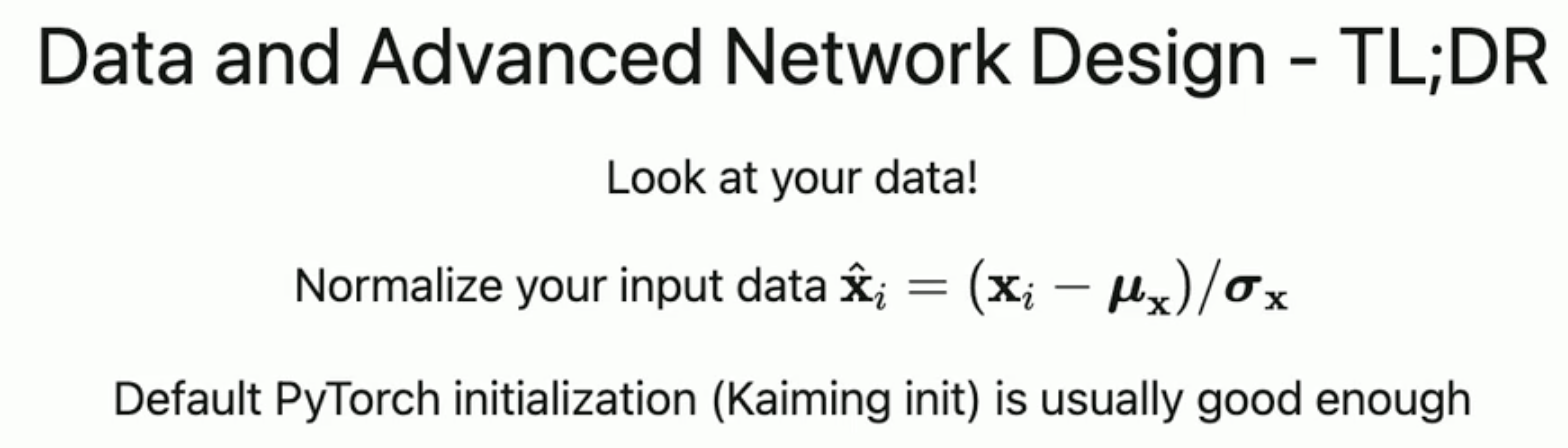